<h1 style="text-align: center;">Data Science Project</h1>
<h2 style="text-align: center;">Part 2</h2>

## Question 1:

In [1]:
# function converts a decimal numbers to binary, octal and hexadecimal bases

def bases(num):
    curr = num
    binary = ""
    while(curr>0):
        temp = curr%2
        binary = str(temp) + binary
        curr=curr//2
        
    curr = num
    octal = ""
    while(curr>0):
        temp = curr%8
        if(temp<9):
            octal = str(temp) + octal
        curr=curr//8
        
    curr = num
    hexa = ""
    dict = {10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F'}
    while(curr>0):
        temp = curr%16
        if(temp<9):
            hexa = str(temp) + hexa
        if(temp>9 and temp<16):
            hexa = dict[temp] + hexa
        curr = curr//16
        
    return "Binary: " + binary, "Octal: " + octal, "Hex: " + hexa

In [2]:
# try function
bases(80)

('Binary: 1010000', 'Octal: 120', 'Hex: 50')

#### Using Python Functions:

In [3]:
# second option using python functions

def bases2(n):
    return "Binary: " + bin(n), "Octal: " + oct(n), "Hex: " + hex(n)

In [4]:
# try function
bases2(80)

('Binary: 0b1010000', 'Octal: 0o120', 'Hex: 0x50')

<h2 style="text-align: center;">Cast Dataset</h2>

In [5]:
# common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# display setup
sns.set_style(style="whitegrid")

In [6]:
# read the csv file
cast = pd.read_csv('cast.csv')
# display first 5 rows
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


> ## Question 1
> How many movies have the title "Hamlet"?

In [7]:
# number of instances with the title "Hamlet"
cast.title[cast.title=='Hamlet'].count()

299

In [8]:
# total number of movies in data with the name "Hamlet"
cast[cast["title"]=="Hamlet"]["year"].drop_duplicates().count()

17

> ## Question 2
> List all the "Treasure Island" movies from earliest to most recent.

In [9]:
# display movies by year without duplicates
cast.loc[cast['title']=='Treasure Island'].drop_duplicates(subset = 'year').sort_values(by = 'year')

,title,year,name,type,character,n
313097,Treasure Island,1918,Francis Carpenter,actor,Jim Hawkins,1.0
345942,Treasure Island,1920,Lon Chaney,actor,Blind Pew,5.0
8570,Treasure Island,1934,Robert Adair,actor,Tom - Seaman,NaN
12141,Treasure Island,1950,Chris Adcock,actor,Pike,26.0
38151,Treasure Island,1972,Cristino Almod?var,actor,O'Brien,18.0
484325,Treasure Island,1973,Richard Dawson,actor,Long John Silver,1.0
14899,Treasure Island,1985,Yves Afonso,actor,French captain,8.0
104905,Treasure Island,1999,Lance (II) Baker,actor,Frank,1.0


> ## Question 3
> How many roles were credited in the silent 1921 version of Hamlet?

In [10]:
# display instances in data
cast[(cast['year']==1921) & (cast['title']=='Hamlet')]

,title,year,name,type,character,n
6710,Hamlet,1921,Fritz Achterberg,actor,"Fortinbras,",9.0
408456,Hamlet,1921,Paul Conradi,actor,K?nig Hamlet,2.0
495468,Hamlet,1921,Anton De Verdier,actor,Laertes,7.0
1015046,Hamlet,1921,Hans Junkermann,actor,Polonius,6.0
1948795,Hamlet,1921,Heinz Stieda,actor,Horatio,5.0
2116906,Hamlet,1921,Eduard von Winterstein,actor,Claudius,4.0
2370048,Hamlet,1921,Mathilde Brandt,actress,K?nigin Gertrude,3.0
2713980,Hamlet,1921,Lilly Jacobson,actress,Ophelia,8.0
2964897,Hamlet,1921,Asta Nielsen,actress,Hamlet,1.0


> ## Question 4
> Use groupby() to plot the number of "Hamlet" films made each decade.

In [11]:
# use groupby for title
cast_years = cast.groupby(by="title")

# get group with the title "Hamlet"
cast_years_hamlet = cast_years.get_group("Hamlet")
# drop duplicate years
cast_years_hamlet = cast_years_hamlet.drop_duplicates("year")

# sort values by year
cast_years_hamlet["year"].value_counts().sort_index()

# find instances per decade
hamlet_years_1910 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1910) & (cast_years_hamlet["year"]<=1919)])
hamlet_years_1920 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1920) & (cast_years_hamlet["year"]<=1929)])
hamlet_years_1930 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1930) & (cast_years_hamlet["year"]<=1939)])
hamlet_years_1940 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1940) & (cast_years_hamlet["year"]<=1949)])
hamlet_years_1950 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1950) & (cast_years_hamlet["year"]<=1959)])
hamlet_years_1960 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1960) & (cast_years_hamlet["year"]<=1969)])
hamlet_years_1970 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1970) & (cast_years_hamlet["year"]<=1979)])
hamlet_years_1980 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1980) & (cast_years_hamlet["year"]<=1989)])
hamlet_years_1990 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=1990) & (cast_years_hamlet["year"]<=1999)])
hamlet_years_2000 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=2000) & (cast_years_hamlet["year"]<=2009)])
hamlet_years_2010 = len(cast_years_hamlet[(cast_years_hamlet["year"]>=2010) & (cast_years_hamlet["year"]<=2019)])

# create a dictionary with instances per decade
decades = {1910: hamlet_years_1910,
           1920: hamlet_years_1920,
           1930: hamlet_years_1930,
           1940: hamlet_years_1940,
           1950: hamlet_years_1950,
           1960: hamlet_years_1960,
           1970: hamlet_years_1970,
           1980: hamlet_years_1980,
           1990: hamlet_years_1990,
           2000: hamlet_years_2000,
           2010: hamlet_years_2010}

# use dictionary to create a series
decades_ser = pd.Series(decades)
decades_ser

# use series to create a DataFrame
decades_df = pd.DataFrame(decades_ser, columns=["count"])

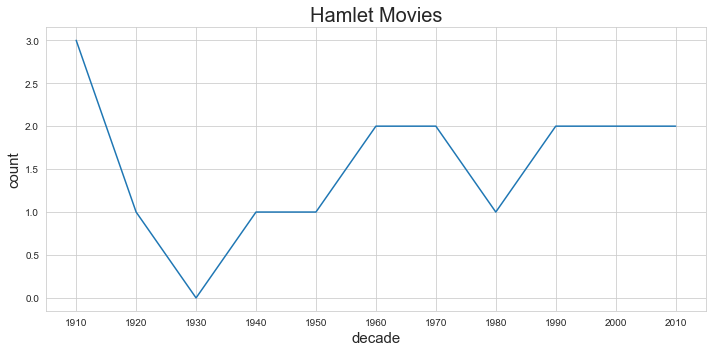

In [12]:
# line plot of "Hamlet" movies per decade
plt.figure(figsize=(10,5))
decades_ser.plot()
plt.xticks(decades_ser.index)
plt.xticks(decades_ser.index)
plt.xlabel("decade", size=15)
plt.ylabel("count", size=15)
plt.title("Hamlet Movies", size=20)
plt.tight_layout()
plt.show()

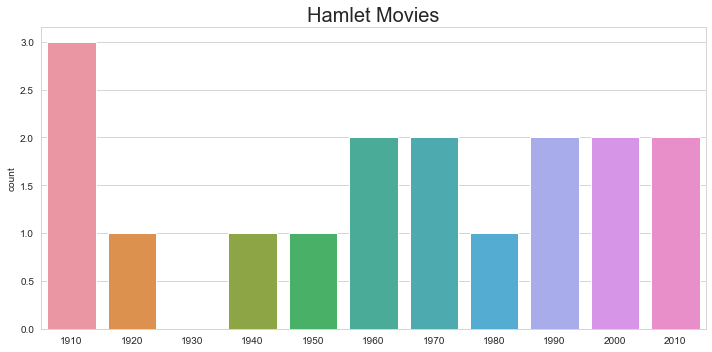

In [13]:
# bar plot of "Hamlet" movies per decade
plt.figure(figsize=(10,5))
sns.barplot(y=decades_df["count"], x=decades_df.index)
plt.title("Hamlet Movies", size=20)
plt.tight_layout()
plt.show()

> ## Question 5
> How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950's?

In [14]:
# instances of lead actors in the 1950's
actress_1950 = cast[(cast['year']>=1950) & (cast['year']<=1959) & (cast['n']==1) &
     (cast["type"]=="actress")]["year"].value_counts().sort_index()

# instances of lead actresses in the 1950's
actor_1950 = cast[(cast['year']>=1950) & (cast['year']<=1959) & (cast['n']==1) &
     (cast["type"]=="actor")]["year"].value_counts().sort_index()

# create a DataFrame with instances of actors and actresses in the 1950's
pd.DataFrame(actor_1950.values, columns=["actor"], index=actor_1950.index).join(
    pd.DataFrame(actress_1950.values, columns=["actress"], index=actress_1950.index))

,actor,actress
1950,604,271
1951,633,272
1952,591,284
1953,634,290
1954,626,298
1955,606,264
1956,614,288
1957,708,284
1958,694,275
1959,678,287


> ## Question 6
> List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.

In [15]:
# display top 10 actors
print("Top 10 Actors:")
print(cast[(cast["n"]==1) & (cast["type"]=="actor") & (cast["year"]>=1990)]["name"].value_counts().head(10), "\n")

# display top 10 actresses
print("Top 10 Actresses:")
print(cast[(cast["n"]==1) & (cast["type"]=="actress") & (cast["year"]>=1990)]["name"].value_counts().head(10))

Top 10 Actors:
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Eric Roberts           68
Amitabh Bachchan       68
Nagarjuna Akkineni     60
Dilip                  59
Name: name, dtype: int64 

Top 10 Actresses:
Judy Ann Santos     36
Maricel Soriano     33
Isabelle Huppert    32
Sharon Cuneta       26
Maggie Cheung       24
Debbie Rochon       19
Michelle Yeoh       19
Sandra Bullock      19
Carmen Maura        18
Juliette Binoche    18
Name: name, dtype: int64


> ## Question 7
> List, in order by years, each of the films in which Frank Oz has played more than 1 role.

In [16]:
# deep copy of Frank Oz instances in data
frank_oz = cast[cast["name"]=="Frank Oz"].copy()
# sort values by year
frank_oz.sort_values(by=["year"], inplace=True)

# false marks all duplicates as true
frank_oz_dup = frank_oz[frank_oz.duplicated("title", keep=False)].copy()
# keeps duplicates only
frank_oz_dup.drop_duplicates("title", inplace=True)

# display duplicated movies
frank_oz_dup.set_index("year").drop(columns=["type", "character", "n"])

,title,name
year,,
1979,The Muppet Movie,Frank Oz
1981,The Great Muppet Caper,Frank Oz
1981,An American Werewolf in London,Frank Oz
1982,The Dark Crystal,Frank Oz
1984,The Muppets Take Manhattan,Frank Oz
1985,Sesame Street Presents: Follow that Bird,Frank Oz
1992,The Muppet Christmas Carol,Frank Oz
1996,Muppet Treasure Island,Frank Oz
1999,The Adventures of Elmo in Grouchland,Frank Oz
